In [1]:
#importing necessary libaries
import cv2
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'cv2'

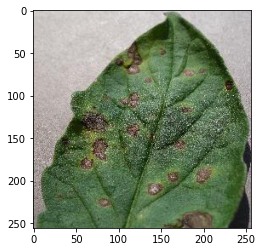

In [2]:
img="http://localhost:8888/view/Untitled%20Folder%201/Tomato___Bacterial_spot%20(7).JPG"
img=cv2.imread(img)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

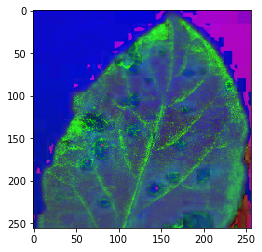

In [3]:
#HSV color space
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(img_hsv)

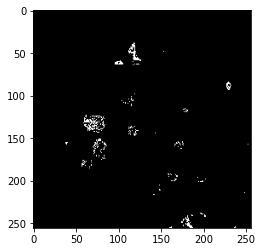

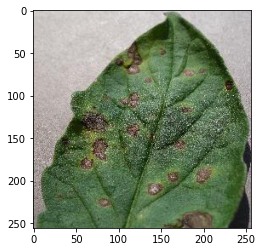

In [4]:
#masking the red regions
mask = cv2.inRange(img_hsv, (6, 63, 0), (23, 255, 81))
#mask2 = cv2.inRange(img_hsv, (170, 100, 20), (180, 255, 255))

#Merge the mask
#mask = cv2.bitwise_or(mask1, mask2)

# Display the masked image
plt.imshow(mask,cmap='gray')
plt.show()
plt.imshow(img)
plt.show()

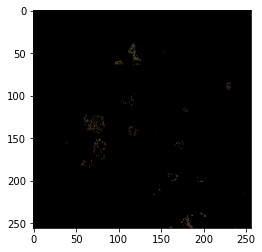

In [5]:
#cropping the mask and displaying the image
croped = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(croped)

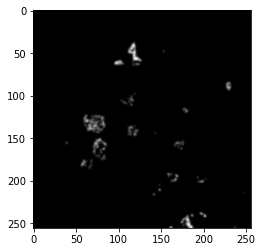

In [6]:
img=croped
imgContour=img.copy()
   
imgBlur=cv2.GaussianBlur(img,(7,7),1) #blurring the image
imgGray=cv2.cvtColor(imgBlur,cv2.COLOR_RGB2GRAY) #converting the image to grayscale

plt.imshow(imgGray,cmap="gray")

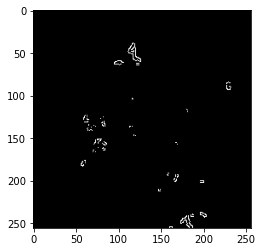

In [7]:
#detecting the edges
imgCanny=cv2.Canny(imgGray,80,80)
kernel=np.ones((5,5))
plt.imshow(imgCanny,cmap='gray')

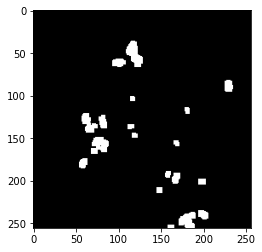

In [8]:
#Dilation is performed to accentuate the features
imgDil=cv2.dilate(imgCanny,kernel,iterations=1)
plt.imshow(imgDil,cmap='gray')

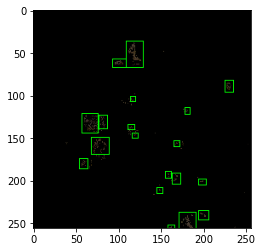

In [9]:
areas=[]
def getContours(img,imgContour):
    contours,hierarchy=cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    img_pixel=[]
    for cnt in contours:
        area = cv2.contourArea(cnt)
        areas.append(area)
        peri = cv2.arcLength(cnt,True)
        approx= cv2.approxPolyDP(cnt,0.02*peri,True)
        x,y,w,h=cv2.boundingRect(approx)
        cv2.rectangle(imgContour,(x,y),(x+w,y+h),(0,255,0),1) #drawing bounding box
        #new_img=img1[y:y+h,x:x+w] #cropping the ROI
        #img_pixel.append(new_img)
    #return np.array(img_pixel)
    
img_pixel=getContours(imgDil,imgContour)
plt.imshow(imgContour)

In [10]:
print(areas)

[21.0, 243.5, 90.5, 36.0, 48.0, 88.0, 37.5, 83.0, 31.0, 271.5, 28.5, 32.5, 105.0, 213.0, 32.0, 24.5, 105.5, 111.5, 319.5]


In [11]:
sum(areas)

1922.0